<a href="https://colab.research.google.com/github/Sathwik-parimi-07/woc/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv(r"/content/drive/MyDrive/woc drive/linear_regression_train (1).csv")

In [ ]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48000 entries, 0 to 47999
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          48000 non-null  int64  
 1   Feature_1   48000 non-null  float64
 2   Feature_2   48000 non-null  float64
 3   Feature_3   48000 non-null  float64
 4   Feature_4   48000 non-null  float64
 5   Feature_5   48000 non-null  float64
 6   Feature_6   48000 non-null  float64
 7   Feature_7   48000 non-null  float64
 8   Feature_8   48000 non-null  float64
 9   Feature_9   48000 non-null  float64
 10  Feature_10  48000 non-null  float64
 11  Feature_11  48000 non-null  float64
 12  Feature_12  48000 non-null  float64
 13  Feature_13  48000 non-null  float64
 14  Feature_14  48000 non-null  float64
 15  Feature_15  48000 non-null  float64
 16  Feature_16  48000 non-null  float64
 17  Feature_17  48000 non-null  float64
 18  Feature_18  48000 non-null  float64
 19  Feature_19  48000 non-nul

,ID,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Target
0,1,-10.429837,21.684251,93.056324,128.914740,1.657315,-34.602633,-70.314374,-89.585318,-98.465642,...,-99.322780,19.560135,25.568291,-40.876179,-116.146068,-82.181299,-99.423518,-41.150654,113.117197,5235.690928
1,2,12.475081,11.652011,-47.621889,-21.892583,-25.844861,-46.951253,-114.500805,-96.257473,-138.354981,...,-89.763107,-8.250307,-8.798353,-23.452091,-56.769063,-26.722372,-97.694304,13.816113,8.711894,-1221.442146
2,3,7.696188,24.729547,43.782383,-53.282523,-69.145794,-57.072335,-114.149171,-105.408739,-71.892560,...,-3.859655,-17.301240,-1.622924,-39.351214,-73.973949,-33.844638,-100.874861,-38.895598,34.488334,-1102.758862
3,4,6.505033,22.092605,-25.161422,4.742729,-20.344550,-50.248793,-89.324731,-104.002016,-160.103875,...,48.557507,-1.997502,-0.856194,-34.259923,-3.113819,13.398035,-94.899866,-77.051331,-16.014027,437.940266
4,5,5.906445,19.909180,24.705865,-51.875251,-24.857500,-25.879977,-37.787560,-99.587673,-47.929647,...,3.556973,-26.643253,-0.976567,-44.127974,-44.249542,-6.166813,-97.099111,-5.426910,-42.191157,755.825367


In [ ]:
data2=data.drop(columns=['ID'],axis=1)

In [ ]:
data2.isnull().sum().unique()    #no negative value

array([0])

In [ ]:
x=data2.iloc[:,:-1].values
y=data2.iloc[:,-1].values

In [ ]:
x.shape

(48000, 25)

In [ ]:
# nan_mask = np.isnan(x)
# if np.any(nan_mask):
#     print("NaN values found in x at positions:", np.where(nan_mask))


# # Check for Inf values
# inf_mask = np.isinf(x)
# if np.any(inf_mask):
#     print("Inf values found in x at positions:", np.where(inf_mask))

# #no inf/nan values :) enjoy

In [ ]:
"""
#for nan values
col_mean = np.nanmean(x, axis=0)
x = np.where(nan_mask, col_mean, x)

# Replace Inf with a large finite value
x = np.where(inf_mask, np.sign(x) * np.finfo(np.float64).max, x)
"""

'\n#for nan values\ncol_mean = np.nanmean(x, axis=0)\nx = np.where(nan_mask, col_mean, x)\n\n# Replace Inf with a large finite value\nx = np.where(inf_mask, np.sign(x) * np.finfo(np.float64).max, x)\n'

In [ ]:
data.corr()

,ID,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Target
ID,1.000000,0.003162,-0.000087,0.005610,-0.001624,-0.002624,0.000267,-0.000003,0.007488,0.001361,...,-0.004113,0.001185,0.000882,0.000151,-0.005997,-0.006303,0.000792,-0.008074,0.008206,0.000211
Feature_1,0.003162,1.000000,0.003750,-0.007193,-0.011171,-0.000805,-0.003489,0.008054,0.007464,-0.003614,...,-0.000125,0.001076,0.002156,-0.007123,0.001413,-0.000281,0.002608,0.001077,-0.006085,0.054712
Feature_2,-0.000087,0.003750,1.000000,0.008600,-0.003447,0.007095,0.001080,-0.001268,0.002993,-0.004500,...,0.002971,0.003875,0.003435,0.002111,-0.000580,-0.000007,0.008454,0.005624,0.001643,0.007267
Feature_3,0.005610,-0.007193,0.008600,1.000000,-0.002682,0.000938,0.006591,-0.002834,-0.001909,-0.004692,...,-0.006656,0.004621,0.002366,-0.001443,-0.008878,-0.001483,0.005715,0.002471,0.008080,0.240100
Feature_4,-0.001624,-0.011171,-0.003447,-0.002682,1.000000,0.004510,0.002015,-0.007309,-0.007768,-0.006608,...,-0.003266,0.003071,-0.003333,-0.000683,-0.003133,0.005046,-0.000858,-0.002296,0.003821,0.334281
Feature_5,-0.002624,-0.000805,0.007095,0.000938,0.004510,1.000000,-0.000779,0.002030,-0.002403,-0.003044,...,-0.011821,0.001751,-0.007260,0.001940,-0.006270,-0.002889,-0.004368,0.002904,-0.001597,0.001245
Feature_6,0.000267,-0.003489,0.001080,0.006591,0.002015,-0.000779,1.000000,0.005044,0.012545,-0.001483,...,-0.004821,0.003872,-0.003202,0.001932,-0.004659,-0.003125,0.002053,0.004182,-0.007828,0.378366
Feature_7,-0.000003,0.008054,-0.001268,-0.002834,-0.007309,0.002030,0.005044,1.000000,0.001026,0.003775,...,-0.002593,-0.001540,0.001474,0.009610,-0.007858,-0.002765,0.009628,0.002787,-0.013098,0.208324
Feature_8,0.007488,0.007464,0.002993,-0.001909,-0.007768,-0.002403,0.012545,0.001026,1.000000,-0.004938,...,0.001917,0.011005,-0.000791,0.005960,-0.000989,-0.001685,-0.003699,0.005937,0.000066,0.004798
Feature_9,0.001361,-0.003614,-0.004500,-0.004692,-0.006608,-0.003044,-0.001483,0.003775,-0.004938,1.000000,...,0.003607,-0.003211,0.009532,-0.009195,0.008632,-0.006531,-0.002328,0.004518,-0.000660,0.296554


In [ ]:
#normalisation features
mean=np.mean(x,axis=0)
sd=np.std(x,axis=0)
x=(x-mean)/sd

print(x)

[[-1.69864257  0.25314326  1.13869653 ... -0.22286562 -0.47196937
   2.27252813]
 [ 0.67201663 -1.49897152 -2.0985691  ...  0.15226832  0.88583556
  -0.21087511]
 [ 0.17740114  0.78499939  0.00481211 ... -0.53771862 -0.41626433
   0.40224792]
 ...
 [ 0.81704195  1.17747749  0.99823079 ... -0.82105666 -1.01309748
   2.17589655]
 [-1.07691097 -0.1244421   0.41474601 ...  2.77345726  0.61758348
  -0.31658482]
 [-0.21901717 -0.87546677 -2.26766168 ...  0.228205   -2.83281419
   0.46684529]]


In [ ]:
#normalisation features

mean=np.mean(y,axis=0)
sd=np.std(y,axis=0)
y=(y-mean)/sd

print(y)

[ 1.84941371 -1.14451262 -1.08948371 ... -1.36789434  1.53227638
 -1.87682995]


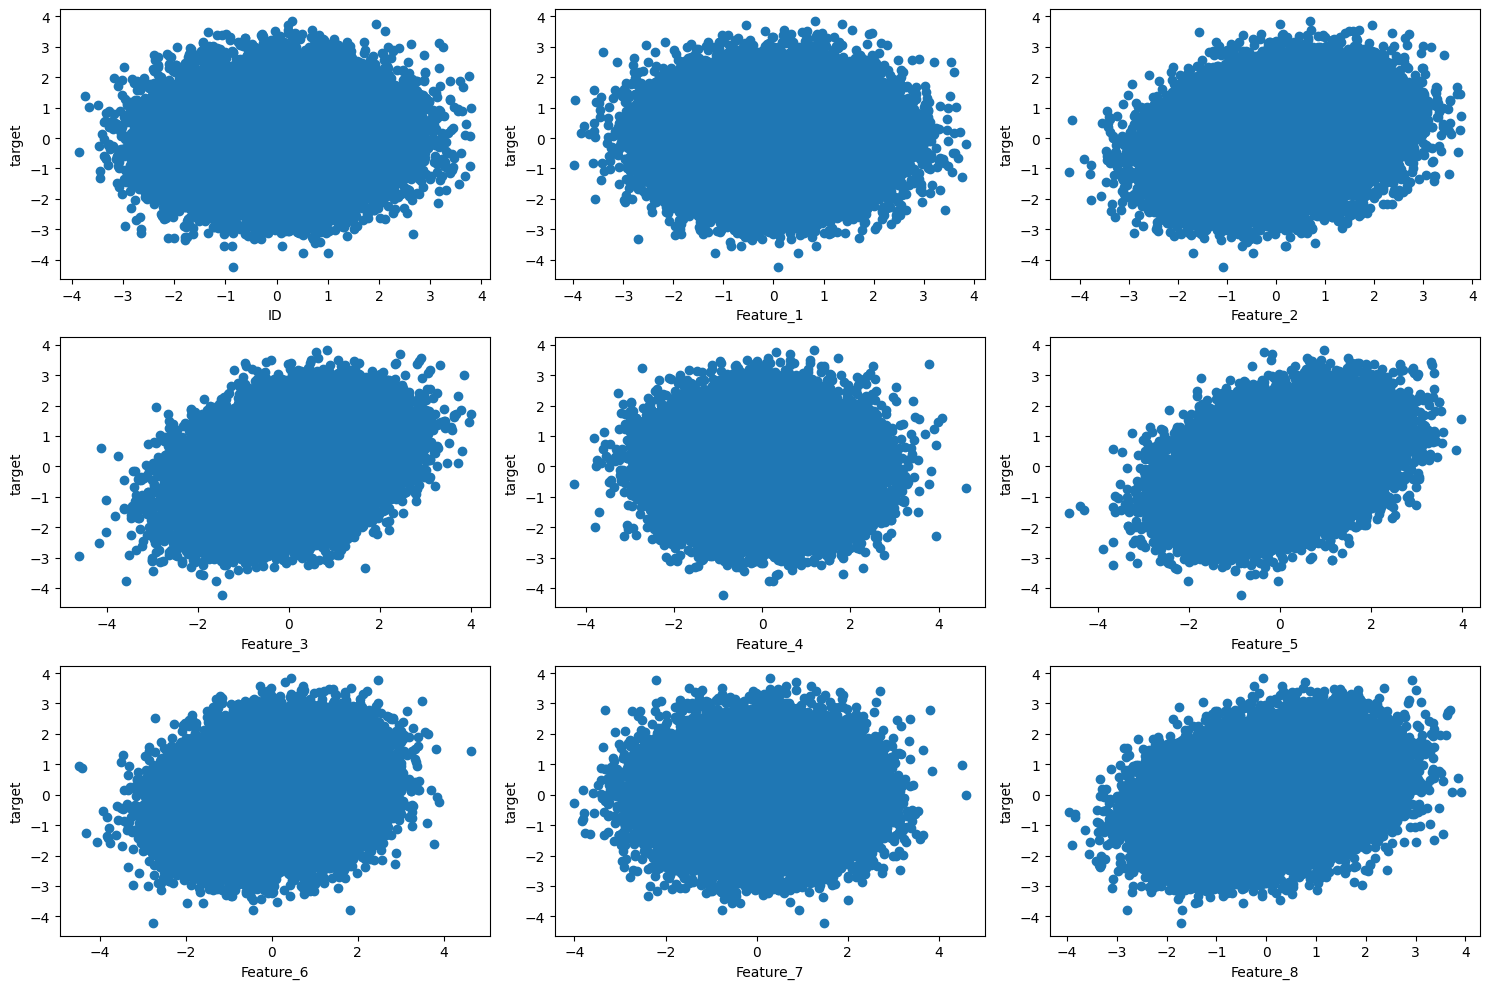

In [ ]:
#cols=data.columns
xlab = data.drop(columns='Target')

fig,axs=plt.subplots(3,3,figsize=(15,10))
axs=axs.flatten()
m,n=x.shape
for i in range(9):
    axs[i].scatter(x[:,i],y)
    axs[i].set_xlabel(xlab.columns[i])
    axs[i].set_ylabel('target')
plt.tight_layout()
plt.show()

In [ ]:
#random guesses
w=np.random.rand(x.shape[1],1) #since we have 25 features
b=0

In [ ]:
w

array([[0.94170933],
       [0.18929948],
       [0.36423854],
       [0.4597123 ],
       [0.54709622],
       [0.94429544],
       [0.39524586],
       [0.94188545],
       [0.98448609],
       [0.47229876],
       [0.02245057],
       [0.66625995],
       [0.62271655],
       [0.46756727],
       [0.21256237],
       [0.57135705],
       [0.79384593],
       [0.36071035],
       [0.37498424],
       [0.39204393],
       [0.17937853],
       [0.96007594],
       [0.88126623],
       [0.35116418],
       [0.3522823 ]])

In [ ]:
print(w.shape)

(25, 1)


In [ ]:
def predict(x,w,b):
    fans=np.dot(x,w)+b
    return fans

In [ ]:
#cost computation
def comcost(x, y, w, b, lambda_=0.1):
    m = x.shape[0]
    # Compute cost
    f_wb = predict(x, w, b)
    errors = f_wb - y.reshape(-1, 1)
    cost = np.sum(errors ** 2) / (2 * m)
    # Add regularization
    reg_cost = (lambda_ / (2 * m)) * np.sum(w ** 2)
    return cost + reg_cost

In [ ]:
cost=comcost(x,y,w,b)
print(cost)

3.05612176847162


In [ ]:
#towards correcting w and b i.e minimising j(w,b)
def comgradient(x, y, w, b, lambda_=0.1):
    m = x.shape[0]
    # Compute error
    err = predict(x, w, b) - y.reshape(-1, 1)
    # Compute gradients
    dj_dw = (1 / m) * np.dot(x.T, err) + (lambda_ / m) * w
    dj_db = (1 / m) * np.sum(err)
    return dj_dw, dj_db

In [ ]:
dj_dw, dj_db=comgradient(x,y,w,b)
print(dj_dw, dj_db)

[[0.87946717]
 [0.21501447]
 [0.1150769 ]
 [0.10181793]
 [0.52990001]
 [0.57298263]
 [0.20387085]
 [0.94846758]
 [0.6673928 ]
 [0.36584338]
 [0.0298532 ]
 [0.67334861]
 [0.26946542]
 [0.14572673]
 [0.20315647]
 [0.33061315]
 [0.76842939]
 [0.15482691]
 [0.17968617]
 [0.06073176]
 [0.12897971]
 [0.94551402]
 [0.82102352]
 [0.14209942]
 [0.3542692 ]] -2.0102438232546167e-15


In [ ]:
def finalpredict(x,y,w_init,b_init,alpha,num_iters,comcost,comgradient,):
    J_history=[] #for graphing at each iteration howmuch j decreased

    b = b_init
    w = w_init
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = comgradient(x, y, w , b)

        # Update Parameters
        b = b - alpha * dj_db
        w = w - alpha * dj_dw

        # Save cost J at each iteration
        if i % 10 == 0:      # prevent resource exhaustion
            J_history.append(comcost(x, y, w , b))



    return w, b, J_history  #return w and J,w history for graphing

In [ ]:
x.shape

(48000, 25)

In [ ]:
w.shape

(25, 1)

In [ ]:
# initialize parameters
w_init = w
b_init = 0
# some gradient descent settings
iterations = 1000
tmp_alpha = 0.01
# run gradient descent
w_final, b_final, J_hist = finalpredict(x ,y, w_init, b_init, tmp_alpha,
                                                    iterations, comcost, comgradient)

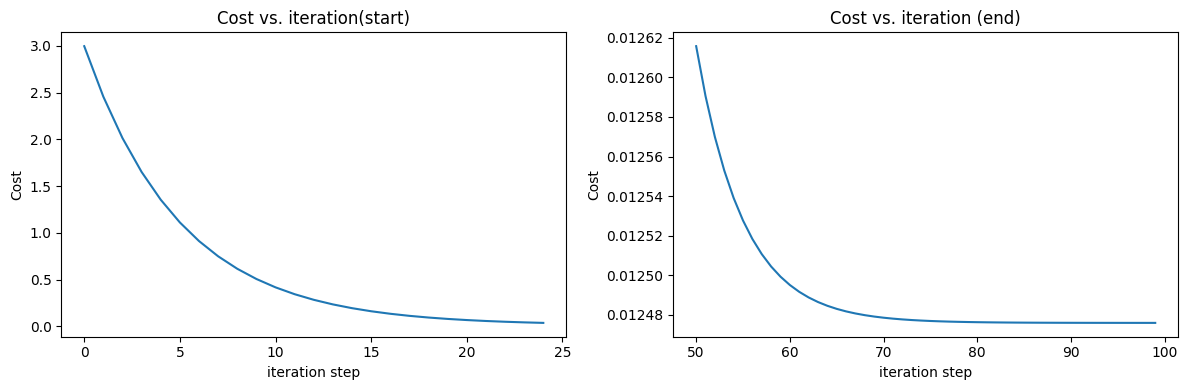

In [ ]:
# plot cost versus iteration
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12,4))
ax1.plot(J_hist[:len(J_hist)//4])  # First quarter of iterations
ax2.plot(np.arange(len(J_hist)//2, len(J_hist)), J_hist[len(J_hist)//2:])  # Last half
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step')
plt.tight_layout()
plt.show()

In [ ]:
J_hist.index(min(J_hist))
J_hist[99]

0.012475896075360846

In [ ]:
J_hist[:10]

[2.9958990852588294,
 2.4554963451847667,
 2.0130200197008423,
 1.650717474835965,
 1.3540557167101965,
 1.1111372281491365,
 0.9122218391791009,
 0.7493353765999818,
 0.6159493358208299,
 0.5067186803861824]

In [ ]:
J_hist[-10:]

[0.012475938975661863,
 0.0124759300246885,
 0.012475922683355631,
 0.012475916662102658,
 0.012475911723476877,
 0.012475907672753079,
 0.012475904350242359,
 0.012475901624985892,
 0.012475899389584207,
 0.012475897555957367]

In [ ]:
w_final.shape  #oh no,

(25, 1)

In [ ]:
y_true=y[:25000]
y_pred=predict(x[:25000,:],w_final,b_final)

In [ ]:
y_pred.ndim

2

In [ ]:
min(y)

-4.234233187004759

In [ ]:
def evaluate_regression(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)

    # Mean squared error
    mse = np.mean((y_true - y_pred) ** 2)

    # Mean absolute error
    mae = np.mean(np.abs(y_true - y_pred))

    # Coefficient of determination (R^2 score)
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    r2 = 1 - (ss_res / ss_tot)

    # Return all metrics
    return {
        "R^2": r2,
        "MSE": mse,
        "MAE": mae
    }

In [ ]:
metrics = evaluate_regression(y_true, y_pred)
print("Evaluation Metrics:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

Evaluation Metrics:
R^2: -49371.7694
MSE: 1.9797
MAE: 1.1236
